In [1]:
#import modules for analyzing ,plotting, and formatting
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import seaborn as sns


In [2]:
#import sklearn and relevant packages
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score

In [3]:
#importing MNIST data from sklearn
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
#X represents the pixels each image, y represents those labels
X, y = mnist['data'], mnist['target']
print(X.shape)
print(y.shape)

y = y.astype(np.uint8)
X_train, X_test, y_train, y_test = X[:6000], X[6000:], y[:6000], y[6000:]

(70000, 784)
(70000,)


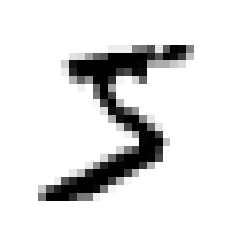

In [5]:
#singliing out an image, we see the first number from the data set.
some_digit = X_train.iloc[0]
some_digit_image = some_digit.values.reshape(28,28)

plt.imshow(some_digit_image, cmap='binary')
plt.axis('off')
plt.show( )

In [6]:
#creating the instance for knn classifier 
knn = KNeighborsClassifier()

In [7]:
#checking the accuracy of the knn classifier with the training set, and 3 folds
cross_val_score(knn, X_train, y_train, cv=3)

array([0.921, 0.934, 0.926])

In [8]:
#determining the number of images that were correctly classifies with cross val predict and the confusion matrix.
y_train_pred = cross_val_predict(knn, X_train, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[584,   1,   0,   1,   1,   2,   2,   1,   0,   0],
       [  0, 664,   1,   1,   1,   0,   0,   2,   0,   2],
       [  8,  31, 511,   6,   2,   1,   4,  14,   3,   1],
       [  1,   9,   4, 567,   3,   9,   2,   6,   4,   3],
       [  0,  23,   0,   0, 560,   1,   6,   1,   1,  31],
       [  5,   7,   2,  15,   2, 460,  11,   1,   0,  11],
       [  5,   3,   0,   0,   1,   4, 595,   0,   0,   0],
       [  0,  16,   1,   0,  11,   2,   0, 605,   0,  16],
       [  3,  16,   8,  22,   6,  14,   5,   5, 466,   6],
       [  6,   3,   1,   7,  15,   1,   1,  16,   1, 550]])

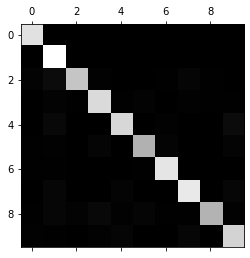

In [9]:
#to better visualize these, we can use matshow, which plots the correctly classified plots.
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

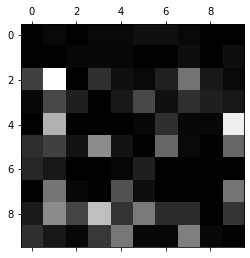

In [10]:
#here the confusion matrix is simplified by showing the error rates vs absoute error from above.
#this is done by dividing the conf matrix by the number of images in each class.
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

#print(norm_conf_mx)

#here we plot those error rates.
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

#the rows represent true classes
#columns represent predicted classes

In [11]:
#in this block I am using GridSearchCV to find the best parameters for the knn 
#classifier. The two hyperparameters I am using are neighbors and weight. 
#I am setting verbose to 3 so that more information is output.
neighbors = list(range(1,6))
weights = ['uniform', 'distance']

param_grid = [
    {'n_neighbors': neighbors, 'weights': weights}
]

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', verbose=3)
grid_search.fit(X_train, y_train) 

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ....n_neighbors=1, weights=uniform;, score=0.920 total time=   0.5s
[CV 2/5] END ....n_neighbors=1, weights=uniform;, score=0.934 total time=   0.3s
[CV 3/5] END ....n_neighbors=1, weights=uniform;, score=0.934 total time=   0.3s
[CV 4/5] END ....n_neighbors=1, weights=uniform;, score=0.938 total time=   0.3s
[CV 5/5] END ....n_neighbors=1, weights=uniform;, score=0.937 total time=   0.3s
[CV 1/5] END ...n_neighbors=1, weights=distance;, score=0.920 total time=   0.3s
[CV 2/5] END ...n_neighbors=1, weights=distance;, score=0.934 total time=   0.3s
[CV 3/5] END ...n_neighbors=1, weights=distance;, score=0.934 total time=   0.3s
[CV 4/5] END ...n_neighbors=1, weights=distance;, score=0.938 total time=   0.3s
[CV 5/5] END ...n_neighbors=1, weights=distance;, score=0.937 total time=   0.3s
[CV 1/5] END ....n_neighbors=2, weights=uniform;, score=0.915 total time=   0.3s
[CV 2/5] END ....n_neighbors=2, weights=uniform;

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5],
                          'weights': ['uniform', 'distance']}],
             scoring='accuracy', verbose=3)

In [12]:
#from grid search I found the best params for this classifier 
print(grid_search.best_params_)
print(grid_search.best_estimator_)

{'n_neighbors': 4, 'weights': 'distance'}
KNeighborsClassifier(n_neighbors=4, weights='distance')


In [17]:
#to make the results easier to view, I look at the accuracy
#paired with the parameters
cvres = grid_search.cv_results_
for accuracy, params in zip(cvres['mean_test_score'], cvres['params']):
  print(np.sqrt(accuracy), params)

0.9656603957913984 {'n_neighbors': 1, 'weights': 'uniform'}
0.9656603957913984 {'n_neighbors': 1, 'weights': 'distance'}
0.962029105588807 {'n_neighbors': 2, 'weights': 'uniform'}
0.9656603957913984 {'n_neighbors': 2, 'weights': 'distance'}
0.9664367542679655 {'n_neighbors': 3, 'weights': 'uniform'}
0.967212489580237 {'n_neighbors': 3, 'weights': 'distance'}
0.9648834126463155 {'n_neighbors': 4, 'weights': 'uniform'}
0.9690201236300514 {'n_neighbors': 4, 'weights': 'distance'}
0.9649697750016146 {'n_neighbors': 5, 'weights': 'uniform'}
0.966350523016019 {'n_neighbors': 5, 'weights': 'distance'}


In [18]:
#lastly, I am predicting on the test set using those best parameters 
y_pred = grid_search.predict(X_test)
print(accuracy_score(y_test, y_pred))

#again a conf matrix is used to determine the correctly predicted labels.

conf_mx_test = confusion_matrix(y_test, y_pred)
conf_mx_test

0.93875


array([[6201,    7,    6,    1,    0,   27,   52,    5,    7,    5],
       [   1, 7149,   19,    6,    5,    3,    6,    6,    3,    8],
       [  83,  145, 5854,   46,   18,   12,   27,  154,   46,   24],
       [  14,   40,   59, 6045,    6,  162,    9,   65,   77,   56],
       [   5,   92,    3,    1, 5755,    1,   31,   22,    3,  288],
       [  34,   37,    8,  151,   21, 5309,  109,   15,   37,   78],
       [  53,   29,    3,    1,   10,   33, 6135,    0,    4,    0],
       [   5,  127,   18,    3,   38,    1,    0, 6285,    2,  163],
       [  53,  139,   51,  160,   59,  140,   43,   38, 5416,  175],
       [  20,   35,    8,   56,  128,   19,    7,  134,   19, 5931]])

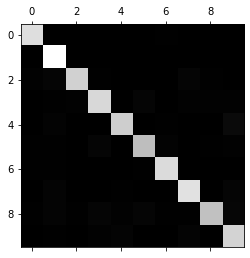

In [19]:
#and a plot is made of the test conf matrix
plt.matshow(conf_mx_test, cmap=plt.cm.gray)
plt.show()

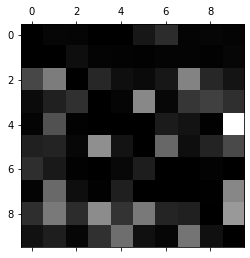

In [20]:
#just as before, we are looking at the rate of error

row_sums_test = conf_mx_test.sum(axis=1, keepdims=True)
norm_conf_mx_test = conf_mx_test / row_sums_test

np.fill_diagonal(norm_conf_mx_test, 0)
plt.matshow(norm_conf_mx_test, cmap=plt.cm.gray)
plt.show()